In [3]:
############################
#For skip data preprocessing
############################
import pandas as pd
sample = pd.read_pickle('data.pickle')
sample[:3]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,style
0,blues.00000.wav,0.34994322,0.13022463,1784.4204464946633,2002.6501916232635,3806.4853160373937,0.08306639113293343,-113.59675,121.5573,-19.158825,...,8.810669,-3.6673682,5.751691,-5.1627626,0.75094783,-1.6919376,-0.40995264,-2.3002088,1.2199285,blues
0,blues.00001.wav,0.3409832,0.095918424,1529.8353159300755,2038.6175789692213,3548.8202074363876,0.056044256724071206,-207.5568,124.00672,8.93056,...,5.376803,-2.2391195,4.2169633,-6.0122733,0.9361094,-0.71653724,0.29387605,-0.2874308,0.5315728,blues
0,blues.00002.wav,0.36360285,0.17557304,1552.4819582458863,1747.1659849613065,3040.514947755418,0.07630074799245357,-90.75439,140.4599,-29.109964,...,5.789265,-8.905224,-1.08372,-9.218358,2.455806,-7.726901,-1.815723,-3.4334342,-2.2268214,blues


In [4]:
# X, y
# y <-- one-hot encoder or label encoder
# X <-- data type astype('float32')
# standarization(optional)
# train_test_split
# build model with algorithm
# model.fit
# model.score & model.predict

In [5]:
# y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_raw = sample.iloc[:, -1].values
y = le.fit_transform(y_raw)
y[:3]

array([0, 0, 0])

In [6]:
# X 頭filename　尾style　不要
X = sample.iloc[:, 1:-1].values.astype('float32')
X[:3]

array([[ 3.49943221e-01,  1.30224630e-01,  1.78442041e+03,
         2.00265015e+03,  3.80648535e+03,  8.30663890e-02,
        -1.13596748e+02,  1.21557297e+02, -1.91588249e+01,
         4.23510323e+01, -6.37645817e+00,  1.86188755e+01,
        -1.36979113e+01,  1.53446312e+01, -1.22852669e+01,
         1.09804916e+01, -8.32432461e+00,  8.81066895e+00,
        -3.66736817e+00,  5.75169086e+00, -5.16276264e+00,
         7.50947833e-01, -1.69193757e+00, -4.09952641e-01,
        -2.30020881e+00,  1.21992850e+00],
       [ 3.40983212e-01,  9.59184244e-02,  1.52983533e+03,
         2.03861755e+03,  3.54882031e+03,  5.60442582e-02,
        -2.07556793e+02,  1.24006721e+02,  8.93056011e+00,
         3.58746872e+01,  2.91603684e+00,  2.15237255e+01,
        -8.55470371e+00,  2.33586712e+01, -1.01036167e+01,
         1.19037437e+01, -5.56038809e+00,  5.37680292e+00,
        -2.23911953e+00,  4.21696329e+00, -6.01227331e+00,
         9.36109424e-01, -7.16537237e-01,  2.93876052e-01,
        -2.87

In [7]:
# 加入資料前處理
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [8]:
# 分割數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

In [9]:
# 確認數據種類 & 個數
import numpy as np
np.bincount(y_train)

array([80, 87, 73, 79, 85, 78, 75, 87, 77, 79], dtype=int64)

In [10]:
# 導入函式庫
import numpy as np  
import keras
from keras.layers import Dense, Activation #神經層
from keras.utils import np_utils           # 用來後續將 label 標籤轉為 one-hot-encoding  


# 建立簡單的線性執行的模型
model = keras.models.Sequential()

# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=256, input_dim=X_train.shape[1], 
                kernel_initializer='normal', activation='relu'))             # input + hidder layer
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))# Add output layer


# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6912      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_TrainOneHot = np_utils.to_categorical(y_train).astype('int32')
y_TestOneHot = np_utils.to_categorical(y_test).astype('int32')

In [16]:
X_train.shape

(800, 26)

In [19]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_train, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=10, 
                          verbose=2)  

print('Done!!')

Epoch 1/10
13/13 - 1s - loss: 0.5868 - accuracy: 0.8047 - val_loss: 1.1062 - val_accuracy: 0.6625
Epoch 2/10
13/13 - 0s - loss: 0.5377 - accuracy: 0.8188 - val_loss: 1.0872 - val_accuracy: 0.6812
Epoch 3/10
13/13 - 0s - loss: 0.5127 - accuracy: 0.8391 - val_loss: 1.1049 - val_accuracy: 0.6375
Epoch 4/10
13/13 - 0s - loss: 0.5028 - accuracy: 0.8344 - val_loss: 1.1082 - val_accuracy: 0.6687
Epoch 5/10
13/13 - 0s - loss: 0.4933 - accuracy: 0.8375 - val_loss: 1.1180 - val_accuracy: 0.6500
Epoch 6/10
13/13 - 1s - loss: 0.4644 - accuracy: 0.8562 - val_loss: 1.1097 - val_accuracy: 0.6750
Epoch 7/10
13/13 - 0s - loss: 0.4529 - accuracy: 0.8672 - val_loss: 1.1142 - val_accuracy: 0.6750
Epoch 8/10
13/13 - 1s - loss: 0.4388 - accuracy: 0.8594 - val_loss: 1.1116 - val_accuracy: 0.6687
Epoch 9/10
13/13 - 0s - loss: 0.4237 - accuracy: 0.8719 - val_loss: 1.1317 - val_accuracy: 0.6562
Epoch 10/10
13/13 - 0s - loss: 0.4116 - accuracy: 0.8703 - val_loss: 1.1132 - val_accuracy: 0.6875
Done!!


In [20]:
scores = model.evaluate(X_test, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


7/7 [==============================] - 0s 23ms/step - loss: 1.3848 - accuracy: 0.6000

	[Info] Accuracy of testing data = 60.0%


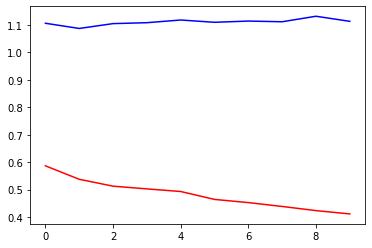

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

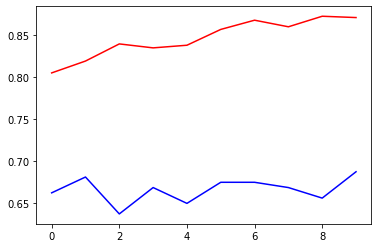

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()